In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install phik==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 26.8 MB/s 
  Created wheel for phik: filename=phik-0.11.1-py3-none-any.whl size=599844 sha256=7e2e8fa1281174e4ae6d802c2bcc9e121194d1e0d0770ef75608347cde668e82
  Stored in directory: /root/.cache/pip/wheels/aa/a6/c3/9bec1a2a836b4ce1b76a129a7305927a76347636d656441111
Successfully built phik


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
sns.set()

In [ ]:
train = pd.read_csv(path + 'train.csv')

In [ ]:
test = pd.read_csv(path + 'test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
#Размеры датасетов
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
#Перед удалением сохраним колонку ID
train_ID = train['Id']
test_ID = test['Id']

#Удалим колонку ID
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Посмотрим график распределения цены

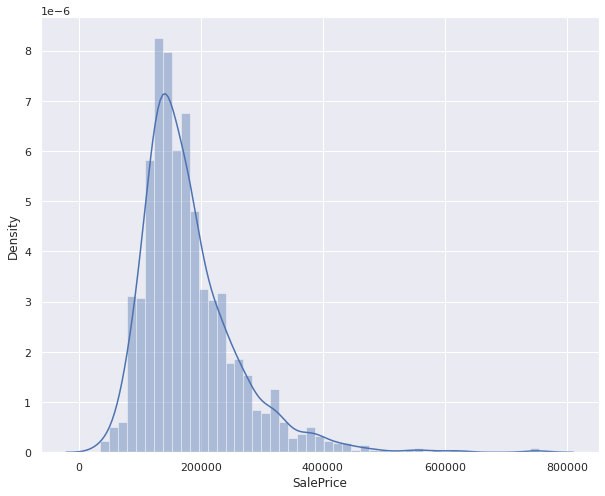

In [ ]:
plt.figure(figsize = (10,8))
sns.distplot(train['SalePrice']);

Целевая переменная наклонена вправо. Поскольку (линейные) модели любят нормально распределенные данные, нам нужно преобразовать эту переменную и сделать ее более нормально распределенной.

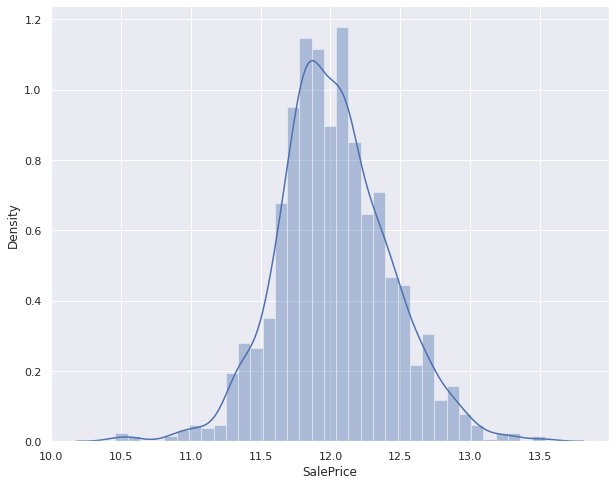

In [ ]:
# Используем функцию numpy log, которая применяет log  ко всем элементам столбца
plt.figure(figsize = (10,8))
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train["SalePrice"]);

Перекос теперь кажется исправленным, и данные выглядят более нормально распределенными

In [ ]:
#сначала объединим данные трейна и теста в один ДФ
df = pd.concat((train, test), axis = 0)
print("Размер полученного ДФ : {}".format(df.shape))

Размер полученного ДФ : (2919, 80)


In [ ]:
#Посчитаем количество пустых значений в процентах
na_ratio = (df.isnull().sum() / len(df)) * 100
na_ratio = na_ratio.drop(na_ratio[na_ratio == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'NaNs %' :na_ratio}).style.format(
    '{:.2f}').background_gradient('coolwarm')
missing_data

,NaNs %
PoolQC,99.66
MiscFeature,96.40
Alley,93.22
Fence,80.44
SalePrice,49.98
FireplaceQu,48.65
LotFrontage,16.65
GarageCond,5.45
GarageYrBlt,5.45
GarageFinish,5.45


In [ ]:
#Количество пропусков в каждом столбце
na_count = df.isnull().sum().sort_values(ascending=False)
na_count = na_count.drop(na_count[na_count == 0].index)
pd.DataFrame({'NaNs count' :na_count}).style.format(
    '{:.0f}').background_gradient('coolwarm')

,NaNs count
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
SalePrice,1459
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageFinish,159
GarageQual,159


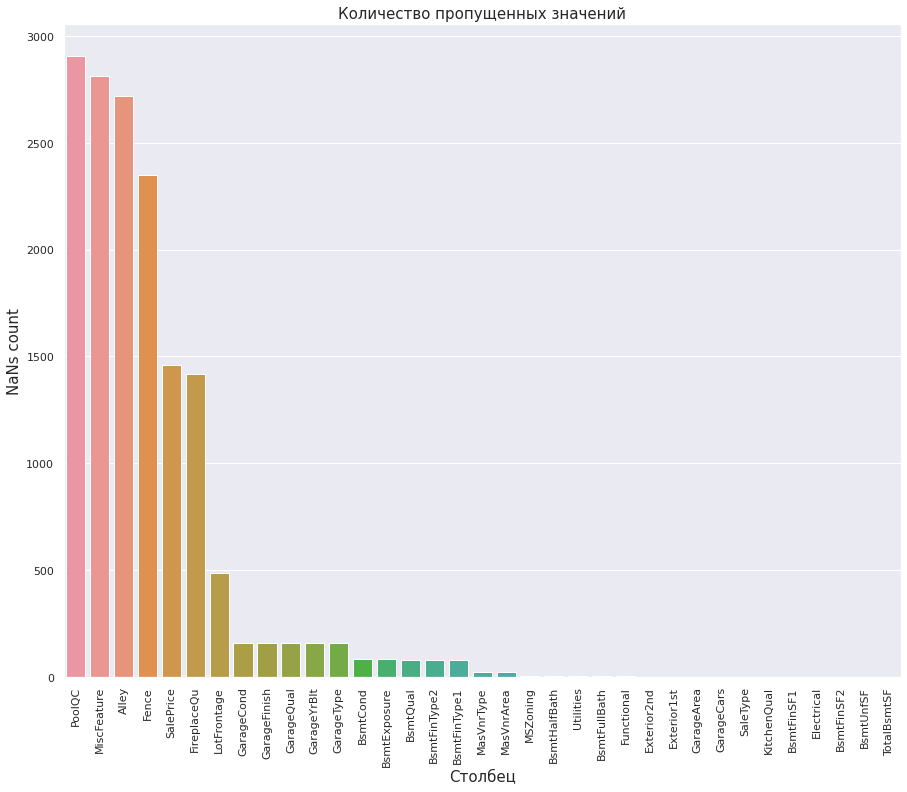

In [ ]:
#График количества пропусков
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=na_count.index, y=na_count)
plt.xlabel('Столбец', fontsize=15)
plt.ylabel('NaNs count', fontsize=15)
plt.title('Количество пропущенных значений', fontsize=15);

In [ ]:
#Посмотрим корреляции признаков
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.00,0.43,0.62,0.00,0.03,0.80,0.24,0.17,0.00,0.14,...,0.00,0.48,0.31,0.16,0.01,0.00,0.08,0.22,0.29,0.38
MSZoning,0.43,1.00,0.30,0.00,0.24,0.66,0.19,0.09,0.00,0.18,...,0.00,NaN,0.03,0.00,0.00,0.05,0.04,0.19,0.18,0.62
LotFrontage,0.62,0.30,1.00,0.40,0.14,0.36,0.48,0.18,NaN,0.26,...,0.59,0.00,0.00,0.00,0.00,0.00,0.05,0.03,0.11,0.31
LotArea,0.00,0.00,0.40,1.00,0.19,NaN,0.30,0.28,0.00,0.12,...,0.18,0.00,0.18,0.00,0.00,0.00,0.01,0.00,0.00,0.12
Street,0.03,0.24,0.14,0.19,1.00,NaN,0.00,0.15,0.00,0.00,...,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.10,0.23,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.00,0.05,0.00,0.00,0.00,0.10,0.00,0.07,0.03,0.07,...,0.03,0.00,0.12,0.00,0.00,1.00,0.32,0.10,0.15,0.05
YrSold,0.08,0.04,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.02,0.32,1.00,0.18,0.15,0.00
SaleType,0.22,0.19,0.03,0.00,0.10,0.31,0.06,0.08,0.09,0.00,...,0.00,0.00,0.00,0.00,0.00,0.10,0.18,1.00,0.73,0.30
SaleCondition,0.29,0.18,0.11,0.00,0.23,0.24,0.09,0.14,0.08,0.03,...,0.11,0.23,0.00,0.26,0.00,0.15,0.15,0.73,1.00,0.34


In [ ]:
interval_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
phik_overview = df.phik_matrix(interval_cols = interval_cols)

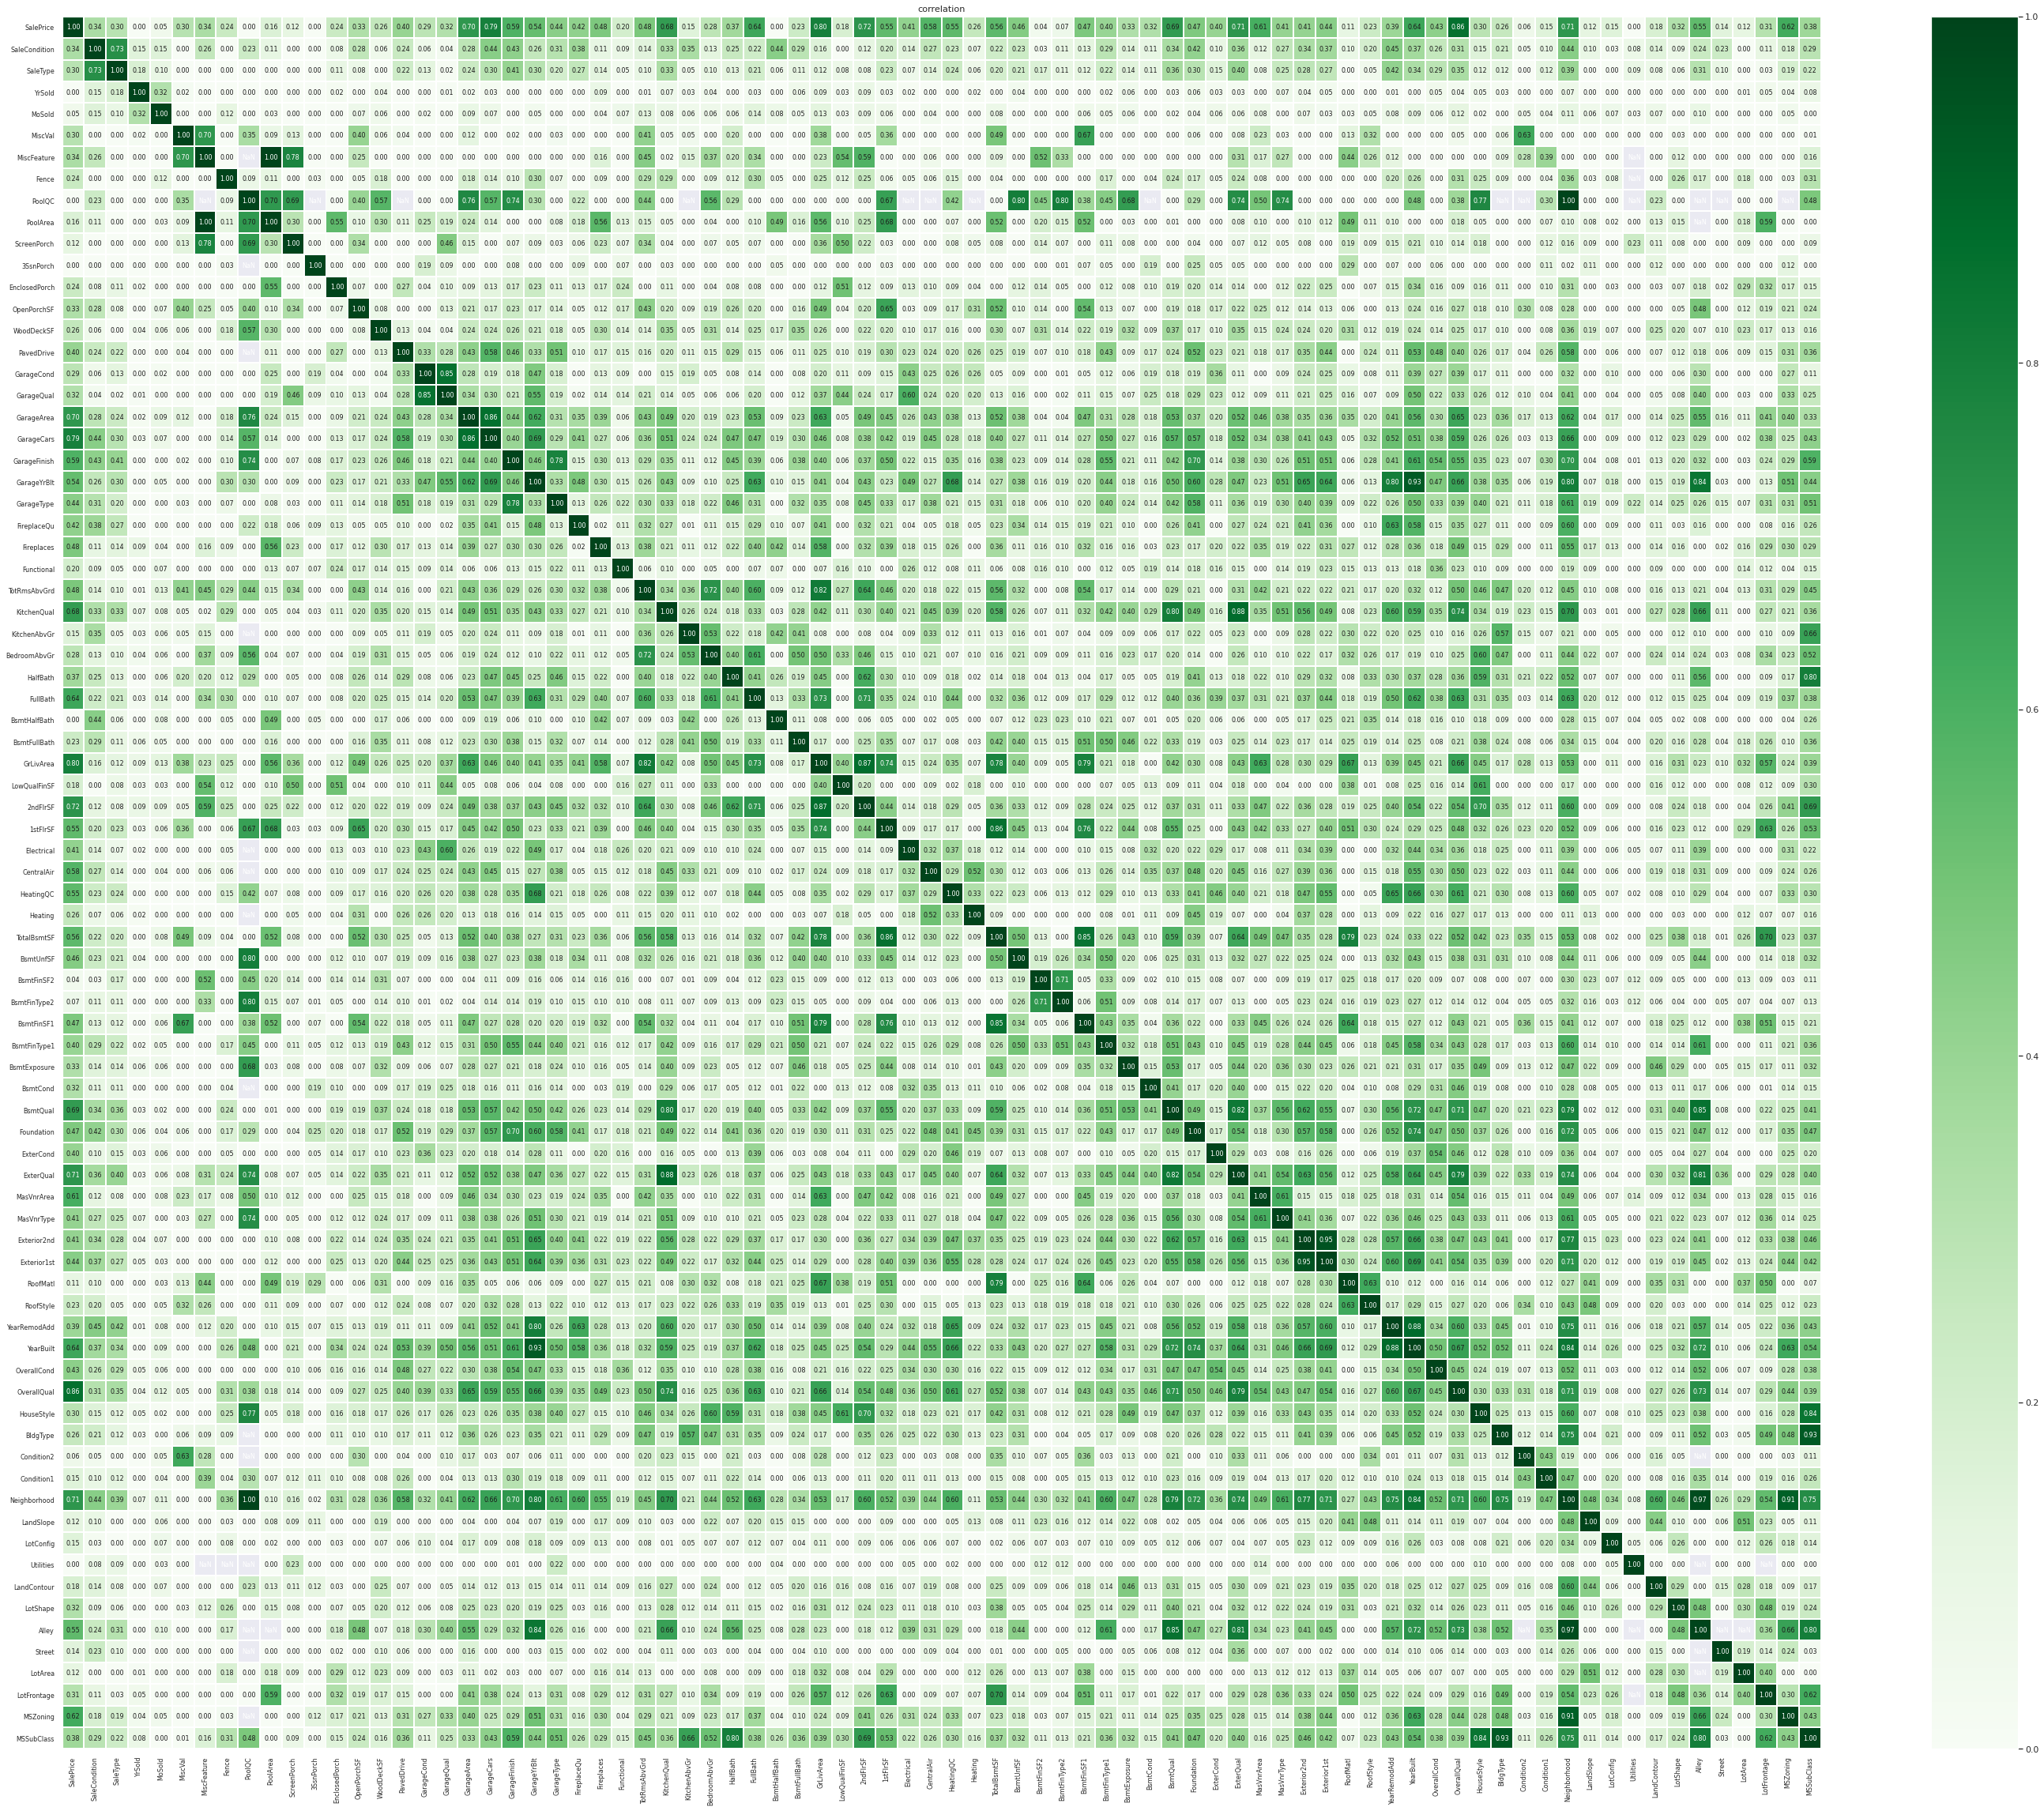

In [ ]:
#График корреляции признаков (лучше смотреть отдельной картинкой)
plot_correlation_matrix(phik_overview.values, 
                       x_labels = phik_overview.columns,
                       y_labels = phik_overview.index,
                       vmin = 0,
                       vmax = 1,
                       color_map= "Greens",
                       fontsize_factor = 0.8,
                       figsize = (40, 32))

## Заполнение пропусков

Сначала рассмотрим столбцы с наибольшим количеством пропусков

### PoolQC

Описание данных говорит, что NA означает нет бассейна. Поэтому заполним пропуски None

In [ ]:
df["PoolQC"] = df["PoolQC"].fillna("None")

### MiscFeature 

Пропуски = "no misc feature"

In [ ]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

### Alley

Пропуски = нет доступа к аллее

In [ ]:
df["Alley"] = df["Alley"].fillna("None")

### Fence 

Пропуски = no fence

In [ ]:
df["Fence"] = df["Fence"].fillna("None")

### FireplaceQu

Пропуски = нет камина

In [ ]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

### LotFrontage

Поскольку площадь каждой улицы, соединенной с домовой собственностью, скорее всего, имеет аналогичную площадь с другими домами в ее районе, мы можем заполнить недостающие значения медианой LotFrontage соседнего района

In [ ]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

Остальные столбцы с пропусками

### Garage

Пропуски в столбцах, относящиеся к гаражам заполним None и 0, т.к. они значат, что гаража нет

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

### Bsmt(подвал)

Пропуски = отсутствие подвала => заполняем None и 0

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

### MasVnr

Пропуски = отсутствие  Masonry veneer для этих домой

In [ ]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

Рассмотрим столбцы, где меньше 5 пропусков

### MSZoning 

Заполним самым частым значением

In [ ]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [ ]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].value_counts().index[0])

### Utilities

In [ ]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

 Т.к. в столбце все значения одинаковые, кроме одного, то можем удалить его

In [ ]:
df = df.drop(['Utilities'], axis=1)

### Functional

In [ ]:
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [ ]:
df["Functional"] = df["Functional"].fillna("Typ")

### Electrical

In [ ]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [ ]:
df['Electrical'] = df['Electrical'].fillna("SBrkr")

### KitchenQual

In [ ]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [ ]:
df['KitchenQual'] = df['KitchenQual'].fillna("TA")

### Exterior

In [ ]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

### SaleType

In [ ]:
df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [ ]:
df['SaleType'] = df['SaleType'].fillna("WD")

### MSSubClass

In [ ]:
df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

Пропуск = класс здания неизвестен

In [ ]:
df['MSSubClass'] = df['MSSubClass'].fillna("None")

Проверим, остались ли пропуски

In [ ]:
df.loc[:, df.isna().sum()!=0]

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1454,NaN
1455,NaN
1456,NaN
1457,NaN


## EDA

In [ ]:
#Проверка на дубликаты
df.duplicated().sum()

0

Переведём некоторые численные столбцы в категориальные

In [ ]:
#MSSubClass - класс здания
df['MSSubClass'] = df['MSSubClass'].apply(str)
#OverallCond - общая оценка состояния
df['OverallCond'] = df['OverallCond'].astype(str)

#Год и месяц продажи
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [ ]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
print(df_numeric.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

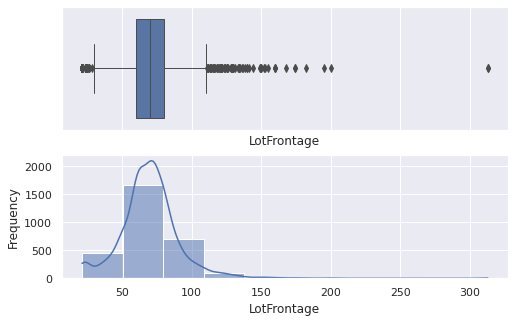

<Figure size 576x360 with 0 Axes>

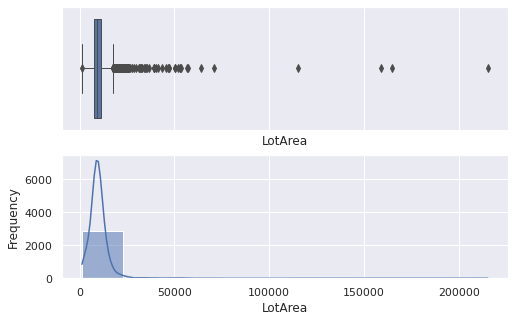

<Figure size 576x360 with 0 Axes>

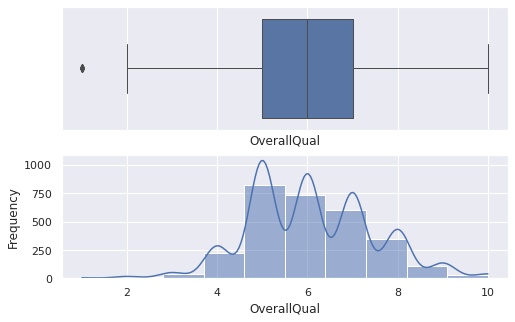

<Figure size 576x360 with 0 Axes>

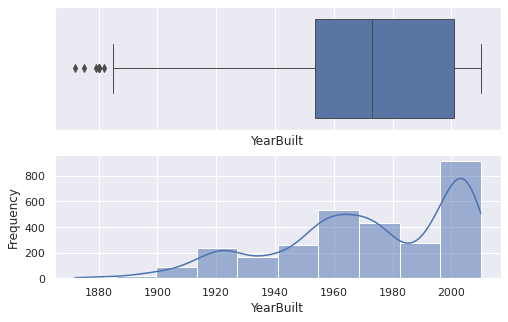

<Figure size 576x360 with 0 Axes>

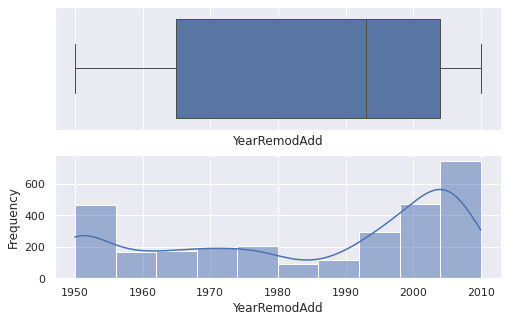

<Figure size 576x360 with 0 Axes>

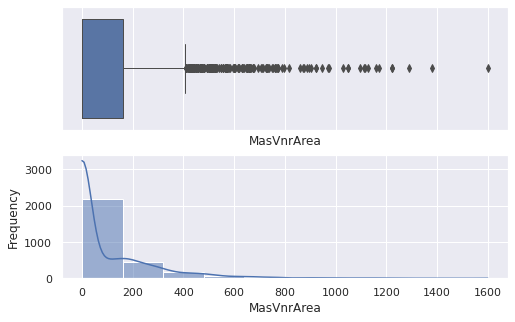

<Figure size 576x360 with 0 Axes>

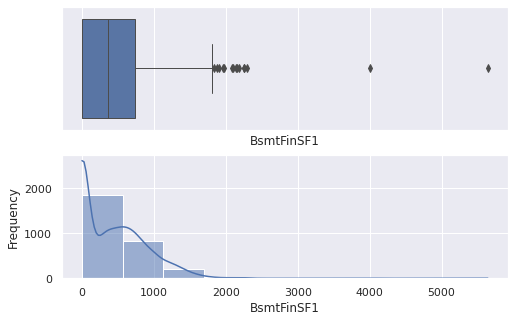

<Figure size 576x360 with 0 Axes>

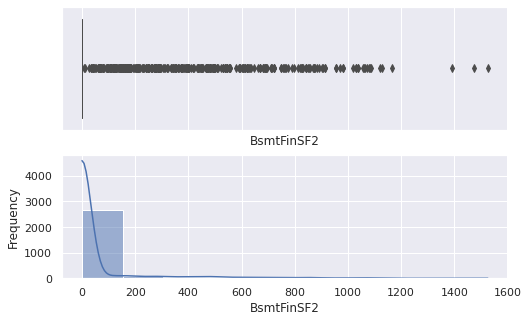

<Figure size 576x360 with 0 Axes>

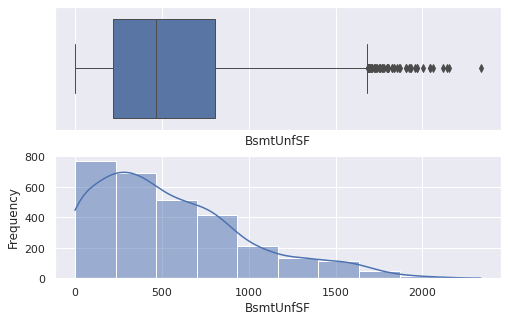

<Figure size 576x360 with 0 Axes>

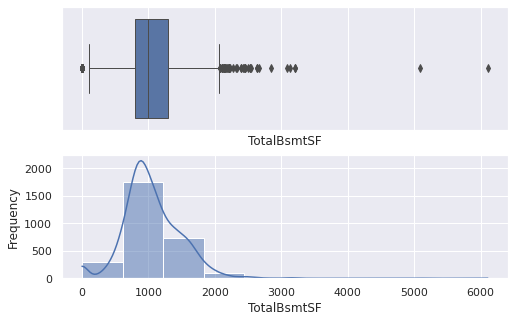

<Figure size 576x360 with 0 Axes>

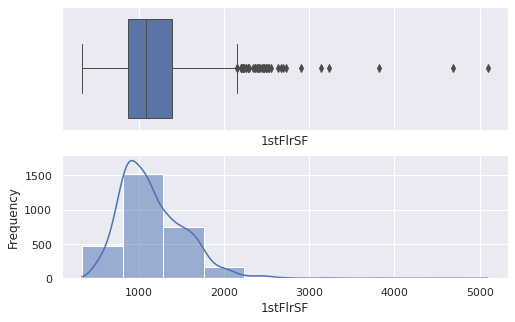

<Figure size 576x360 with 0 Axes>

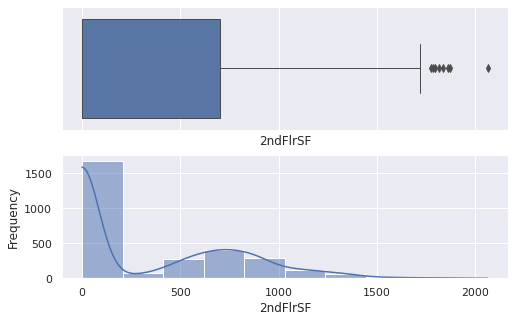

<Figure size 576x360 with 0 Axes>

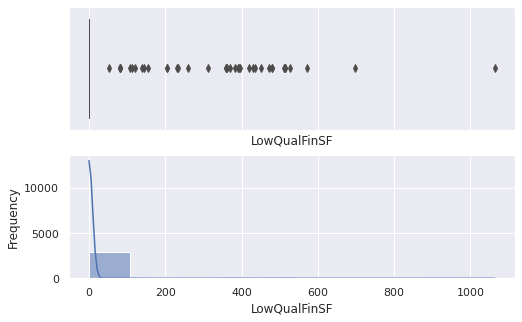

<Figure size 576x360 with 0 Axes>

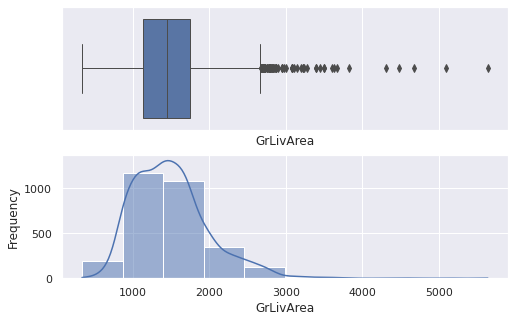

<Figure size 576x360 with 0 Axes>

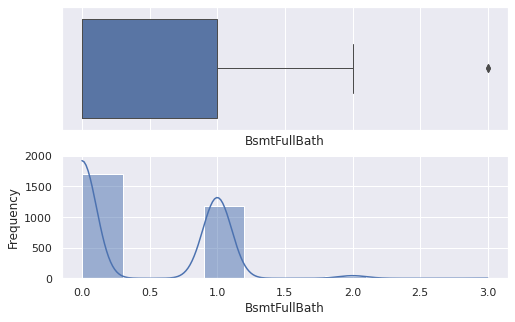

<Figure size 576x360 with 0 Axes>

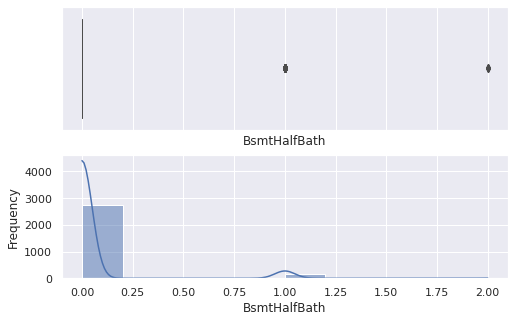

<Figure size 576x360 with 0 Axes>

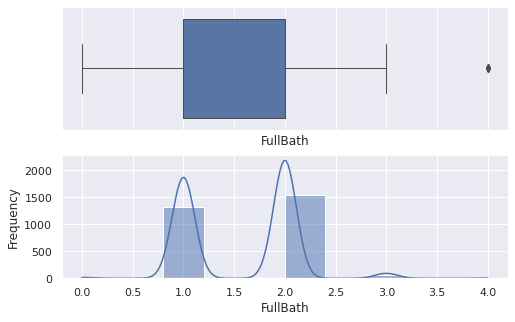

<Figure size 576x360 with 0 Axes>

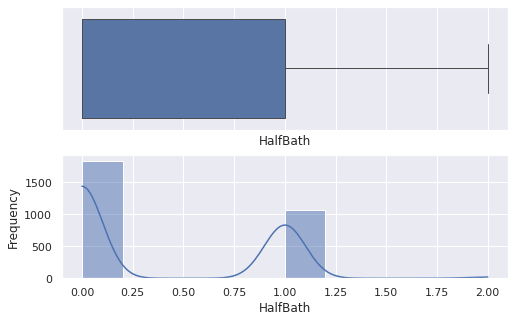

<Figure size 576x360 with 0 Axes>

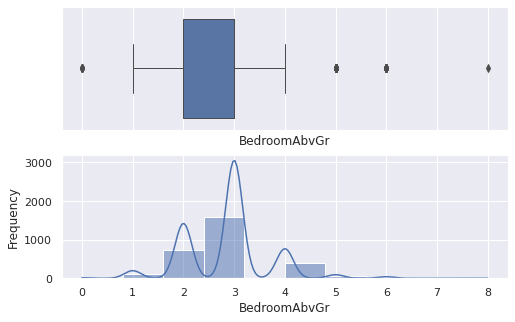

<Figure size 576x360 with 0 Axes>

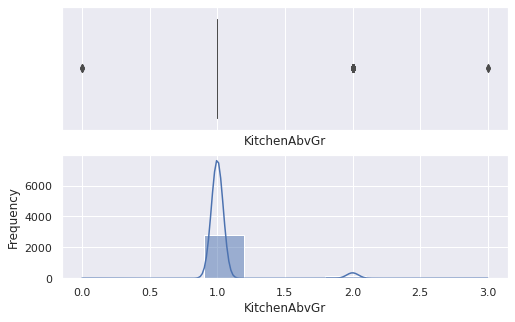

<Figure size 576x360 with 0 Axes>

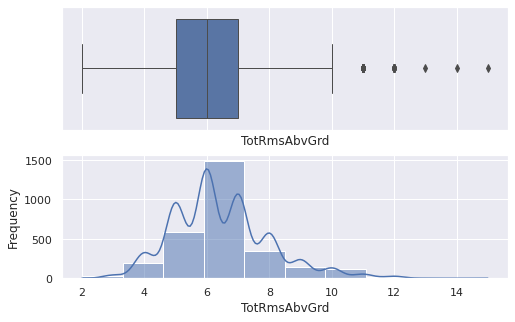

<Figure size 576x360 with 0 Axes>

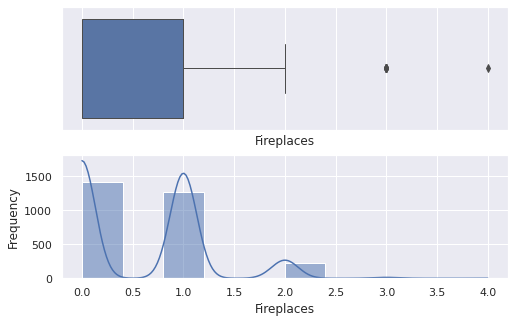

<Figure size 576x360 with 0 Axes>

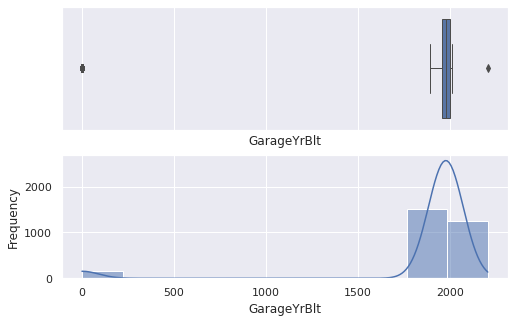

<Figure size 576x360 with 0 Axes>

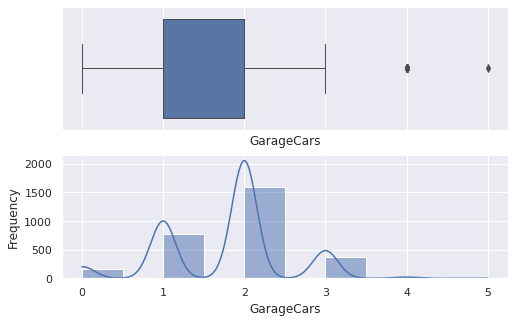

<Figure size 576x360 with 0 Axes>

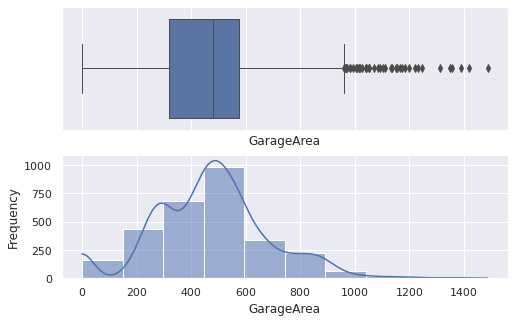

<Figure size 576x360 with 0 Axes>

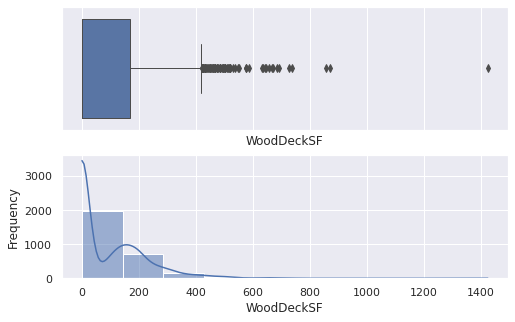

<Figure size 576x360 with 0 Axes>

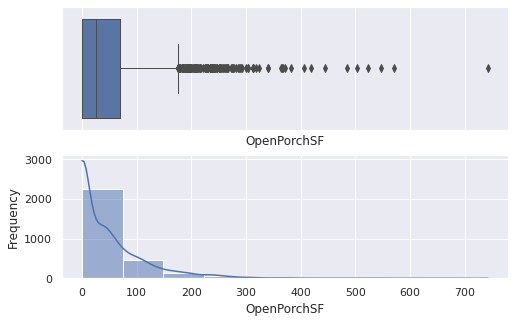

<Figure size 576x360 with 0 Axes>

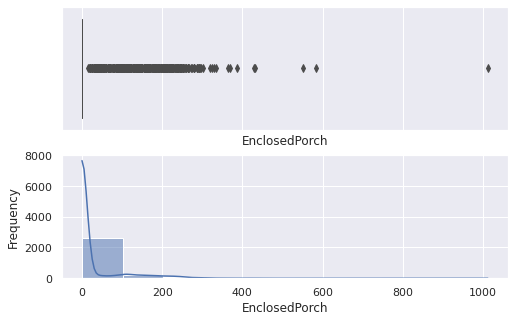

<Figure size 576x360 with 0 Axes>

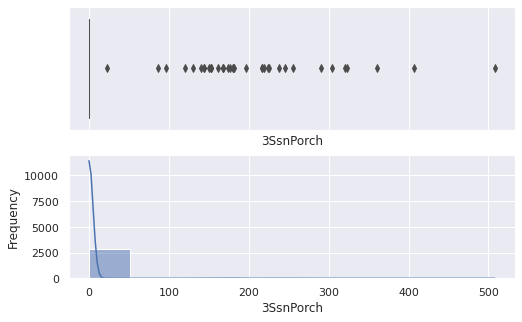

<Figure size 576x360 with 0 Axes>

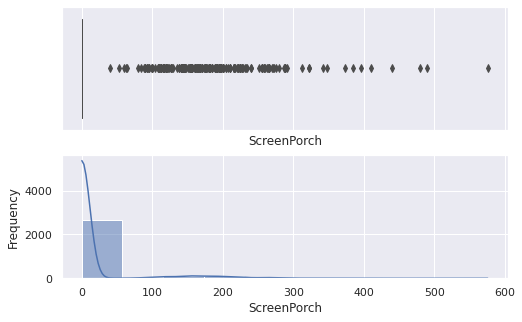

<Figure size 576x360 with 0 Axes>

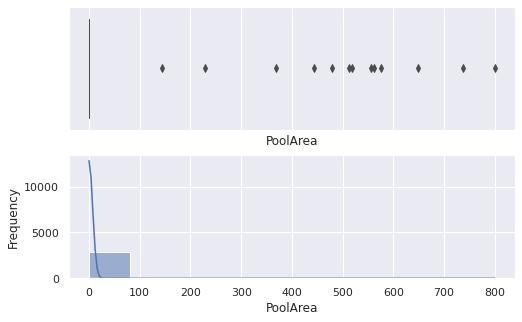

<Figure size 576x360 with 0 Axes>

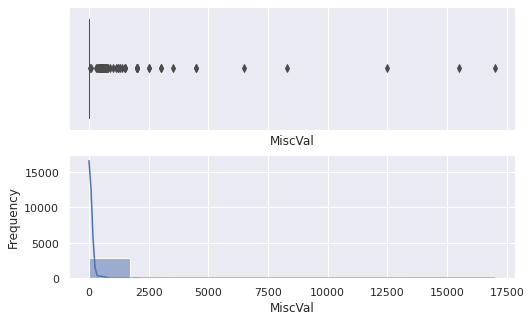

<Figure size 576x360 with 0 Axes>

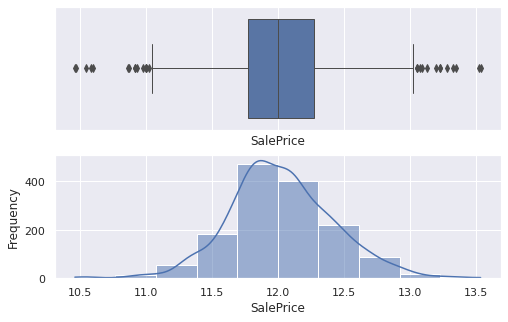

In [ ]:
#Построим гистограммы и ящики с усами для числовых колонок
for i in df_numeric.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True);

Выбросы:
- LotArea > 100000
- LotFrontage > 300
- OverallQual < 2
- YearBuilt < 1880
- MasVnrArea >1200
- BsmtFinSF1 > 2500
- BsmtFinSF2 > 1200
- BsmtUnfSF > 2200
- TotalBsmtSF > 3500
- 1stFlrSF > 3000
- 2ndFlrSF > 2000
- GrLivArea > 4000
- FullBath > 3
- TotRmsAbvGrd > 10
- Fireplaces > 2
- GarageYrBlt > 2020
- GarageCars > 3
- GarageArea > 1400
- WoodDeckSF > 800
- OpenPorchSF > 600
- EnclosedPorch > 500
- 3SsnPorch > 350
- ScreenPorch > 500
- PoolArea > 600 
- MiscVal > 5000







In [ ]:
outl = df[(df['LotArea'] > 100000) |
(df['LotFrontage'] > 300) | 
(df['YearBuilt'] < 1880) | 
(df['OverallQual'] < 2) |
(df['GarageYrBlt'] > 2020) |
(df['GarageArea'] > 1200) |
(df['MasVnrArea'] >1200)|
(df['BsmtFinSF1'] > 2500) |
(df['BsmtFinSF2'] > 1200) |
(df['BsmtUnfSF'] > 2200) |
(df['TotalBsmtSF'] > 3500) |
(df['1stFlrSF'] > 3000) |
(df['2ndFlrSF'] > 2000) |
(df['LowQualFinSF'] > 600) |
(df['WoodDeckSF'] > 600) |
(df['OpenPorchSF'] > 600) |
(df['EnclosedPorch'] > 500) |
(df['MiscVal'] > 5000) |
(df['GrLivArea'] > 4000)]

Найдем индексы строк с выбросами для трейна

In [ ]:
outl[outl['SalePrice'].notna()].index

Int64Index([  53,  197,  224,  249,  297,  313,  322,  335,  346,  375,  496,
             523,  533,  581,  691,  706,  825,  934, 1061, 1068, 1137, 1169,
            1182, 1190, 1210, 1230, 1298, 1313, 1349, 1459],
           dtype='int64')

In [ ]:
df.shape

(2919, 79)

In [ ]:
data = df.copy()

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data = data.drop(outl[outl['SalePrice'].notna()].index)

In [ ]:
data.shape

(2889, 79)

Добавим столбцы общей площади и общего качества

In [ ]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['Area_Qual'] = data['TotalSF']*data['OverallQual']

Выделим таргет

In [ ]:
y = data['SalePrice'].dropna()
data = data.drop('SalePrice', axis = 1)

Посмотрим распределения и смещения численных фичей

In [ ]:
skewed = data[data.select_dtypes([np.number]).columns].apply(skew).sort_values(ascending=False)
print("\nСмещения численных фичей: \n")
skewness = pd.DataFrame({'Смещение' :skewed})
skewness.head(10)


Смещения численных фичей: 



,Смещение
MiscVal,25.282443
PoolArea,19.748963
LowQualFinSF,12.369898
3SsnPorch,11.316146
KitchenAbvGr,4.294917
BsmtFinSF2,4.101495
EnclosedPorch,3.966892
BsmtHalfBath,3.951257
ScreenPorch,3.935815
LotArea,3.607727


In [ ]:
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.1
_skewed = data[data.select_dtypes([np.number]).columns].apply(lambda x: boxcox1p(x,lam)).apply(skew).sort_values(ascending=False)
skewness['Приведенный'] = pd.Series(_skewed)
data[data.select_dtypes([np.number]).columns] = data[data.select_dtypes([np.number]).columns].apply(lambda x: boxcox1p(x,lam))
skewness.head(10)

,Смещение,Приведенный
MiscVal,25.282443,5.515680
PoolArea,19.748963,17.185027
LowQualFinSF,12.369898,8.869893
3SsnPorch,11.316146,8.838055
KitchenAbvGr,4.294917,3.631912
BsmtFinSF2,4.101495,2.536673
EnclosedPorch,3.966892,1.998906
BsmtHalfBath,3.951257,3.800534
ScreenPorch,3.935815,2.953003
LotArea,3.607727,-0.552675


Кодируем категориальные колонки в численные

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.shape

(2889, 338)

Выделяем трейн и тест после обработки данных

In [ ]:
train = data[:y.shape[0]]

In [ ]:
test = data[y.shape[0]:]

In [ ]:
train.shape, test.shape

((1430, 338), (1459, 338))

## Создание моделей

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

Скалируем

In [ ]:
scaler = RobustScaler()

In [ ]:
train = scaler.fit_transform(train)

In [ ]:
test = scaler.transform(test)

In [ ]:
pca = PCA(0.999)

In [ ]:
scr = make_scorer(mean_squared_error, greater_is_better=True)

### GBR

In [ ]:
GBR = GradientBoostingRegressor()

In [ ]:
pipe = Pipeline(steps=[("GBR", GBR)])

In [ ]:
parameters_gbr = {'GBR__learning_rate': [0.01,0.02,0.03,0.04],
                  'GBR__subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'GBR__n_estimators' : [100,150],
                  'GBR__max_depth'    : [4,6,8,10]
                 }

In [ ]:
grid_GBR = GridSearchCV(pipe, param_grid = parameters_gbr, cv = 4, n_jobs=-1, verbose = 2, scoring = scr, return_train_score=True)

In [ ]:
grid_GBR.fit(train, y)

Fitting 4 folds for each of 128 candidates, totalling 512 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('GBR', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'GBR__learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'GBR__max_depth': [4, 6, 8, 10],
                         'GBR__n_estimators': [100, 150],
                         'GBR__subsample': [0.9, 0.5, 0.2, 0.1]},
             return_train_score=True, scoring=make_scorer(mean_squared_error),
             verbose=2)

In [ ]:
cv_results = pd.DataFrame(grid_GBR.cv_results_)

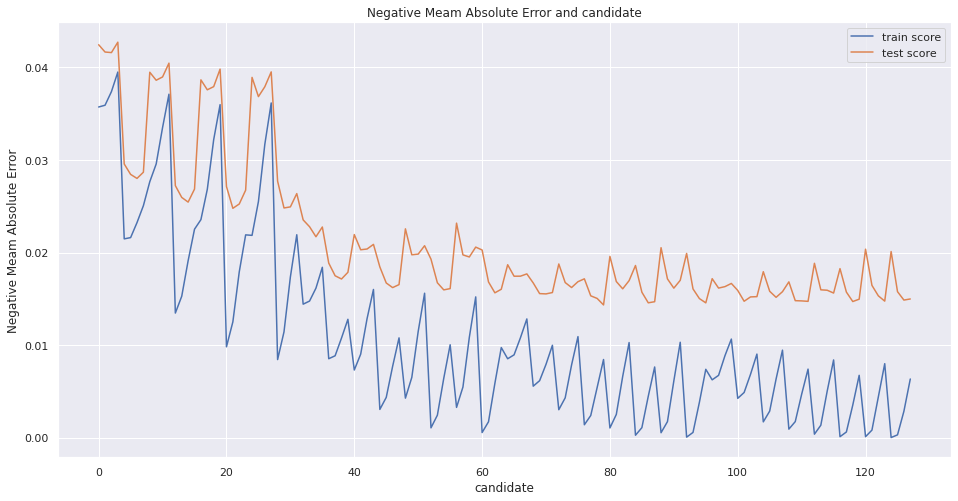

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['mean_train_score'])
plt.plot(cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and candidate')
plt.xlabel('candidate')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [ ]:
res = pd.DataFrame(columns=['name_model',
                          'best_score'                                
                         ],
                 data=[['GBR',
                        grid_GBR.best_score_
                        ]]
                )
res

,name_model,best_score
0,GBR,0.042728


### XGBoost

In [ ]:
xgbr = XGBRegressor()

In [ ]:
pipe = Pipeline(steps=[("xgbr", xgbr)])

In [ ]:
parameters_xgbr = {
    'xgbr__n_estimators': [100, 150, 200],
    'xgbr__max_depth': [4, 6, 8, 10],
    'xgbr__reg_alpha': [1.1, 1.2, 1.3],
    'xgbr__reg_lambda': [1.1, 1.2, 1.3],
    'xgbr__subsample': [0.7, 0.8, 0.9]
}

In [ ]:
grid_xgbr = GridSearchCV(pipe, param_grid = parameters_xgbr, cv = 4, n_jobs=-1, verbose = 2, scoring = scr, return_train_score=True)

In [ ]:
grid_xgbr.fit(train, y)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits
[12:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4, estimator=Pipeline(steps=[('xgbr', XGBRegressor())]),
             n_jobs=-1,
             param_grid={'xgbr__max_depth': [4, 6, 8, 10],
                         'xgbr__n_estimators': [100, 150, 200],
                         'xgbr__reg_alpha': [1.1, 1.2, 1.3],
                         'xgbr__reg_lambda': [1.1, 1.2, 1.3],
                         'xgbr__subsample': [0.7, 0.8, 0.9]},
             return_train_score=True, scoring=make_scorer(mean_squared_error),
             verbose=2)

In [ ]:
cv_results_xgbr = pd.DataFrame(grid_xgbr.cv_results_)

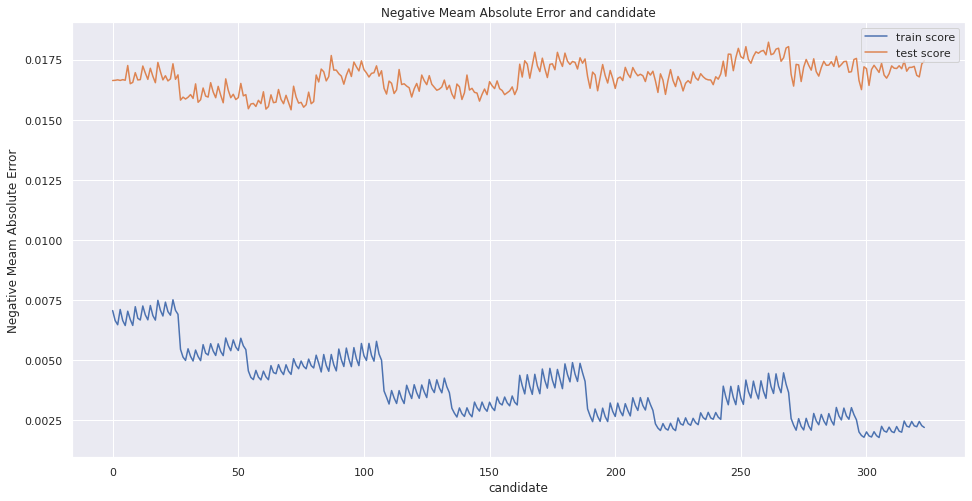

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_results_xgbr['mean_train_score'])
plt.plot(cv_results_xgbr['mean_test_score'])

plt.title('Negative Meam Absolute Error and candidate')
plt.xlabel('candidate')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [ ]:
res.loc[res.shape[0]]=['XGBR',
                        grid_xgbr.best_score_
                                          ]
res

,name_model,best_score
0,GBR,0.042728
1,XGBR,0.018227


### Lasso

In [ ]:
lsr = Lasso()

In [ ]:
pipe = Pipeline(steps=[("lsr", lsr)])

In [ ]:
lasso_params = {'lsr__alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]}


In [ ]:
grid_lsr = GridSearchCV(pipe, param_grid = lasso_params, cv = 4, n_jobs=-1, verbose = 2, scoring = scr, return_train_score=True)

In [ ]:
grid_lsr.fit(train, y)

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Pipeline(steps=[('lsr', Lasso())]), n_jobs=-1,
             param_grid={'lsr__alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                        0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                        2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                        10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring=make_scorer(mean_squared_error),
             verbose=2)

In [ ]:
cv_results_lsr = pd.DataFrame(grid_lsr.cv_results_)

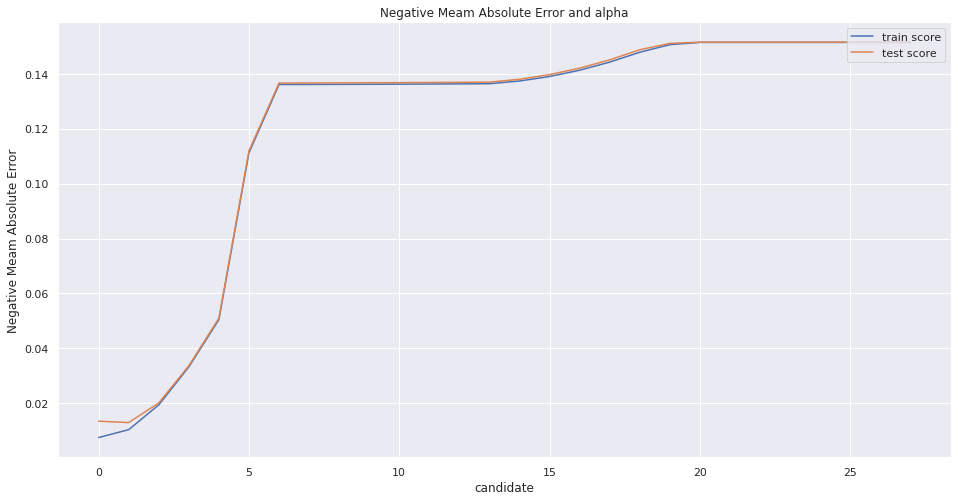

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_results_lsr['mean_train_score'])
plt.plot(cv_results_lsr['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('candidate')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [ ]:
res.loc[res.shape[0]]=['LASSO',
                        grid_lsr.best_score_
                                          ]
res

,name_model,best_score
0,GBR,0.042728
1,XGBR,0.018227
2,LASSO,0.151524


### Ridge

In [ ]:
rr = Ridge()

In [ ]:
pipe = Pipeline(steps=[("rr", rr)])

In [ ]:
ridge_params = {'rr__alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

In [ ]:
grid_rr = GridSearchCV(pipe, param_grid = ridge_params, cv = 4, n_jobs=-1, verbose = 2, scoring = scr, return_train_score=True)

In [ ]:
grid_rr.fit(train, y)

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Pipeline(steps=[('rr', Ridge())]), n_jobs=-1,
             param_grid={'rr__alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                       0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                       3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                       20, 50, 100, 500, 1000]},
             return_train_score=True, scoring=make_scorer(mean_squared_error),
             verbose=2)

In [ ]:
cv_results_rr = pd.DataFrame(grid_rr.cv_results_)

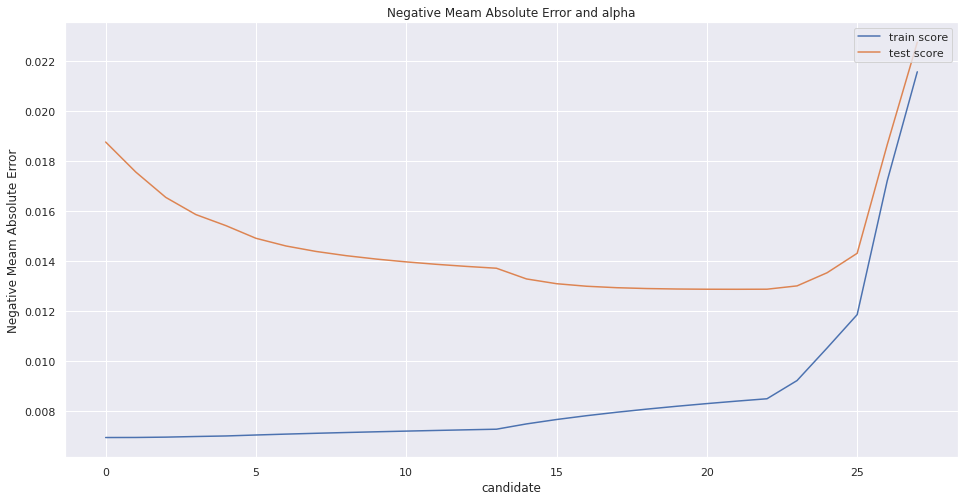

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_results_rr['mean_train_score'])
plt.plot(cv_results_rr['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('candidate')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [ ]:
res.loc[res.shape[0]]=['Ridge',
                        grid_rr.best_score_
                                          ]
res

,name_model,best_score
0,GBR,0.042728
1,XGBR,0.018227
2,LASSO,0.151524
3,Ridge,0.022742


### LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = Pipeline(steps=[("lr", lr)])

In [ ]:
lr_params = {'lr__fit_intercept':[True,False], 'lr__normalize':[True,False], 'lr__copy_X':[True, False]}

In [ ]:
grid_lr = GridSearchCV(pipe, param_grid = lr_params, cv = 4, n_jobs=-1, verbose = 2, scoring = scr, return_train_score=True)

In [ ]:
grid_lr.fit(train, y)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=Pipeline(steps=[('lr', LinearRegression())]),
             n_jobs=-1,
             param_grid={'lr__copy_X': [True, False],
                         'lr__fit_intercept': [True, False],
                         'lr__normalize': [True, False]},
             return_train_score=True, scoring=make_scorer(mean_squared_error),
             verbose=2)

In [ ]:
cv_results_lr = pd.DataFrame(grid_lr.cv_results_)

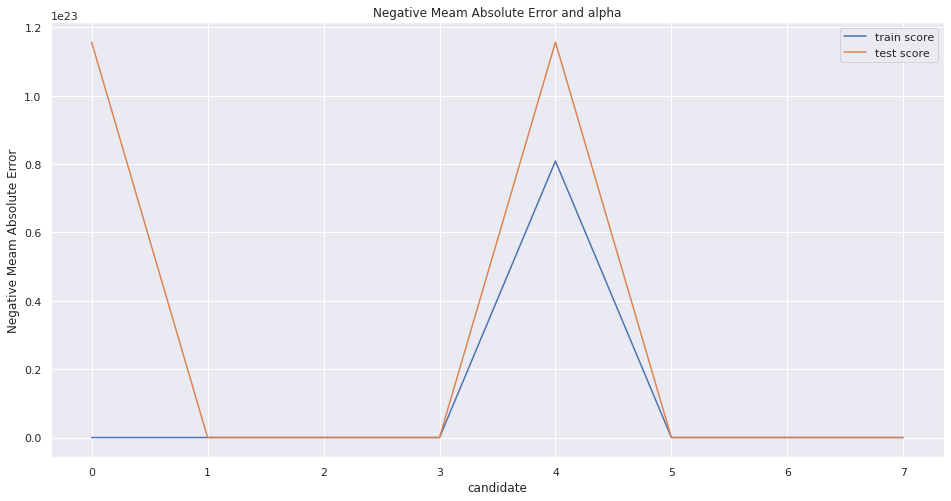

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_results_lr['mean_train_score'])
plt.plot(cv_results_lr['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('candidate')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [ ]:
res.loc[res.shape[0]]=['LinearRegression',
                        grid_lr.best_score_
                                          ]
res

,name_model,best_score
0,GBR,4.272778e-02
1,XGBR,1.822706e-02
2,LASSO,1.515239e-01
3,Ridge,2.274197e-02
4,LinearRegression,1.156736e+23


### CatBoost

In [ ]:
ctb = CatBoostRegressor()

In [ ]:
pipe = Pipeline(steps=[("ctb", ctb)])

In [ ]:
parameters_ctb = {'ctb__depth': [6,8,10], 'ctb__learning_rate' : [0.01, 0.05, 0.1, 0.001, 0.005], 'ctb__iterations' : [30, 50, 100]}

In [ ]:
grid_ctb = GridSearchCV(pipe, param_grid = parameters_ctb, cv = 4, n_jobs=-1, verbose = 2, scoring = scr, return_train_score=True)

In [ ]:
grid_ctb.fit(train, y)

Fitting 4 folds for each of 45 candidates, totalling 180 fits
0:	learn: 0.3889219	total: 116ms	remaining: 3.37s
1:	learn: 0.3886616	total: 178ms	remaining: 2.49s
2:	learn: 0.3884029	total: 237ms	remaining: 2.13s
3:	learn: 0.3881435	total: 296ms	remaining: 1.93s
4:	learn: 0.3878839	total: 334ms	remaining: 1.67s
5:	learn: 0.3876426	total: 395ms	remaining: 1.58s
6:	learn: 0.3873877	total: 456ms	remaining: 1.5s
7:	learn: 0.3871439	total: 515ms	remaining: 1.42s
8:	learn: 0.3868731	total: 581ms	remaining: 1.35s
9:	learn: 0.3866167	total: 642ms	remaining: 1.28s
10:	learn: 0.3863683	total: 705ms	remaining: 1.22s
11:	learn: 0.3861108	total: 766ms	remaining: 1.15s
12:	learn: 0.3858432	total: 839ms	remaining: 1.1s
13:	learn: 0.3855985	total: 897ms	remaining: 1.02s
14:	learn: 0.3853395	total: 956ms	remaining: 956ms
15:	learn: 0.3850822	total: 1.02s	remaining: 894ms
16:	learn: 0.3848184	total: 1.09s	remaining: 831ms
17:	learn: 0.3845544	total: 1.15s	remaining: 769ms
18:	learn: 0.3842967	total: 1.21

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('ctb',
                                        <catboost.core.CatBoostRegressor object at 0x7f92f9756490>)]),
             n_jobs=-1,
             param_grid={'ctb__depth': [6, 8, 10],
                         'ctb__iterations': [30, 50, 100],
                         'ctb__learning_rate': [0.01, 0.05, 0.1, 0.001, 0.005]},
             return_train_score=True, scoring=make_scorer(mean_squared_error),
             verbose=2)

In [ ]:
cv_results_ctb = pd.DataFrame(grid_ctb.cv_results_)

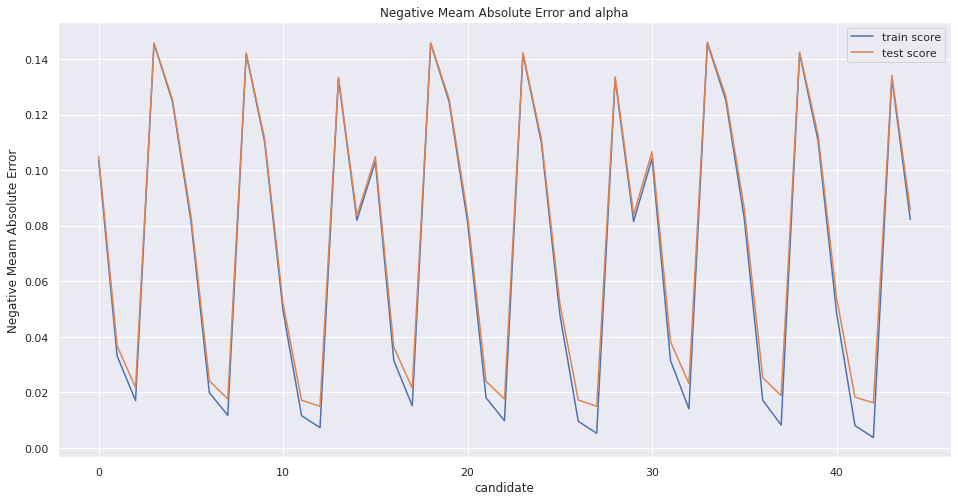

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_results_ctb['mean_train_score'])
plt.plot(cv_results_ctb['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('candidate')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [ ]:
res.loc[res.shape[0]]=['CatBoost',
                        grid_ctb.best_score_
                                          ]
res

,name_model,best_score
0,GBR,4.272778e-02
1,XGBR,1.822706e-02
2,LASSO,1.515239e-01
3,Ridge,2.274197e-02
4,LinearRegression,1.156736e+23
5,CatBoost,1.460500e-01


In [ ]:
train_predict = 0.1 * grid_GBR.predict(train) + 0.7 * grid_xgbr.predict(train) + 0.1 *grid_lsr.predict(train) + 0.1 * grid_rr.predict(train)

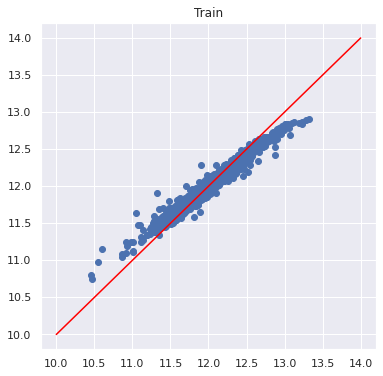

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y, train_predict)
plt.title("Train")
plt.plot(range(10, 15), range(10, 15), color="red");

In [ ]:
test_predict = 0.1 * grid_GBR.predict(test) + 0.7 * grid_xgbr.predict(test) + 0.1 *grid_lsr.predict(test) + 0.1 * grid_rr.predict(test)

In [ ]:
submission = pd.DataFrame(test_ID, columns = ['Id'])
test_pred = np.expm1(test_predict)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,127178.188238
1,1462,160488.376208
2,1463,180003.927210
3,1464,190323.617035
4,1465,186050.966158


In [ ]:
submission.to_csv("result.csv", index = False, header = True)